In [1]:
# font stuff
import matplotlib.font_manager as font_manager
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from os.path import expanduser
import matplotlib as mpl
import seaborn as sns

sns.set_style("ticks")
fontpath = expanduser('~/.local/share/fonts/LinLibertine_DRah.ttf')
prop = font_manager.FontProperties(fname=fontpath)

params = {
    "axes.titlesize" : 16,
    'axes.labelsize': 12,
    'font.size': 12,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'font.family': prop.get_name(),
    'text.usetex': True
}
mpl.rcParams.update(params)

In [2]:
# imports
from helpers import jaccard, populate_bin_with_channel, bins_y_o, bins_t_o, bin_to_df
from helpers import triple_bin_to_df, intersec_3, colors, human_format
from matplotlib.patches import Polygon
from sqlitedict import SqliteDict
import numpy as np
import pandas as pd

In [3]:
# aux functions & vars

def helper_df(df, shenanigans=True):
    df["idx_str"] = bins_t_o
    df_years = df.tail(11)
    if shenanigans:
        df_years["x+y"] = df_years["x"] + df_years["y"] - df_years["intersection"] 
        df_years["xyz_p"] = df_years["intersection"] / df_years["x+y"]
        df_years["intersection/x"] = df_years["intersection"] / df_years["x"]
    return df_years

cats = ["Alt-right", "Alt-lite", "Intellectual Dark Web", "Control"]
cats_all = ["Alt-right", "Alt-lite", "Intellectual Dark Web", "left",
            "center", "left-center", "right-center", "right"]
cats_to_control = ["center", "left-center", "right-center", "left", "right"]



# Temporal Exploratory Analysis

## Common Commenting Users Along the Years

In [4]:
# Read channels
SRC = "/home/manoelribeiro/Dropbox/data/youtube_radicalization/"
df_sources = pd.read_csv(SRC + "sources_final_trimmed.csv")
channel_dict = SqliteDict(SRC+ "/helpers/channel_dict.sqlite", tablename="channels")

In [5]:
# Create bins and populate them with channels
bins_ar, bins_al, bins_idw, bins_control = {b:set() for b in bins_y_o}, {b:set() for b in bins_y_o}, \
                                           {b:set() for b in bins_y_o}, {b:set() for b in bins_y_o}

for bin_dict, cat in zip([bins_ar, bins_al, bins_idw] + [bins_control] * len(cats_to_control), cats_all):
    for channel in df_sources.loc[df_sources["Category"] == cat, "Id"]:
        print(channel, cat)
        populate_bin_with_channel(channel, channel_dict, bin_dict)

UCSTy-H5lSiCcozas32sfJlQ Alt-right
UCMLbmp5tcLxzahMLTmeM4lg Alt-right
UCyZVnp-_owuoPlzNJNtaxZQ Alt-right
UCmtALVZjXFzb4v3fIXDmDyw Alt-right
UClMWnUHbxJKJLUgloN1mPUA Alt-right
UC4f8Z2XefBDL421pnNEQH0Q Alt-right
UCFc0stDRUkeBDc36qZeox1g Alt-right
UCFUC7NaTxZanB_FVOJN92eg Alt-right
UC_NPMpK-gZVIKqvDRljgbBA Alt-right
UC2JVrseRgh0ccDQ7c8qnXTQ Alt-right
UCXfJ65sVQ5F3nJsm86yM6jA Alt-right
UC94FYUJYBqq4CHPhfJUCxDw Alt-right
UCAgBUlIpzlJaE0693J3s97w Alt-right
UCp-c7UZowNgx_sGtGCI8M1g Alt-right
UCZeP6H2mELnRI9imY5Iga0g Alt-right
UCOtFVJUoek4TKZAaeQVhiLA Alt-right
UCIZBXVGIJoJMXf8giib0IiQ Alt-right
UCowcNKm1w2GGw5U_XQeduhg Alt-right
UCN0-RRaxMgh86eOwndAklxw Alt-right
UCLfhh63n0fWn0gXXKQ5NWvw Alt-right
UCutpp9X6rKErxUkv4wKBRPA Alt-right
UCNP2yhz10CUEKhzHCUu2r4Q Alt-right
UCGJNdaSwFeP3pLd1MhN0dRg Alt-right
UCmrLCXSDScliR7q8AxxjvXg Alt-right
UCZmn5TswQ0m13ihKsbJ8Wzw Alt-right
UC68k9B1W2GTDZv9e10ySrxA Alt-right
UCBceihEYR7elOoeWTuDhAzA Alt-right
UCVyzFlPnWjqrgVljH8QUiCQ Alt-right
UCoWQunH1zvFa6u3IoMX

UCW5BbfOqiBPIf_SZOe85Wjg Intellectual Dark Web
UC-uP8fChoXf3FTHyttRRkUw Intellectual Dark Web
UC5c-JkKHb0YxFZ81XBtFCmw Intellectual Dark Web
UCchU0j9bXOa_E1xbxB5MqbQ Intellectual Dark Web
UCNAxrHudMfdzNi6NxruKPLw Intellectual Dark Web
UCi5N_uAqApEUIlg32QzkPlg Intellectual Dark Web
UCodkb-qBktJI5NrUsPYpf7g Intellectual Dark Web
UCL_f53ZEJxp8TtlOkHwMV9Q Intellectual Dark Web
UCnQC_G5Xsjhp9fEJKuIcrSw Intellectual Dark Web
UCJdKr0Bgd_5saZYqLCa9mng Intellectual Dark Web
UCeamuoYuBeRnRRbmq5CmjVg Intellectual Dark Web
UCl9s0VpZwQuvTCyZj_VtCwg Intellectual Dark Web
UC26rydyZRPAr51aJ2k9QHTQ Intellectual Dark Web
UCOh7DIo6IRIccz6QMkWkWlQ Intellectual Dark Web
UCWCtoOXSwTcbVjOiK8iFGUg Intellectual Dark Web
UCaeO5vkdj5xOQHp4UmIN6dw Intellectual Dark Web
UCZWlSUNDvCCS1hBiXV0zKcA Intellectual Dark Web
UCo9QgwWCNEhDxL1gH-jxa8Q Intellectual Dark Web
UCNdW82WWvjQEF5tUWVXvdKg Intellectual Dark Web
UC2i_hx_UfauBFh5DA3YWfDg Intellectual Dark Web
UC_SD8q_CLdAoeb1_uiJOvmA Intellectual Dark Web
UCtD9a-aXIYS6

In [10]:
# Creates shifted bins
bins_ar_sl, bins_al_sl, bins_idw_sl, bins_control_sl = {b:set() for b in bins_y_o}, {b:set() for b in bins_y_o}, \
                                           {b:set() for b in bins_y_o}, {b:set() for b in bins_y_o}

for bin_dict, bin_sl_dict in zip([bins_ar, bins_al, bins_idw, bins_control], 
                                 [bins_ar_sl, bins_al_sl, bins_idw_sl, bins_control_sl]):
    for idx in range(len(list(bins_ar.keys()))- 1):
        shifted = sorted(bin_dict.keys())[idx+1]
        actual = sorted(bin_dict.keys())[idx]
        bin_sl_dict[shifted] = bin_dict[actual]

In [11]:
# Create bins intersection given the specified function, here, `jaccard` and intersec_3
df_ar_al = helper_df(bin_to_df(bins_y_o, bins_ar, bins_al, jaccard))
df_ar_idw = helper_df(bin_to_df(bins_y_o, bins_ar, bins_idw, jaccard))
df_al_idw = helper_df(bin_to_df(bins_y_o, bins_al, bins_idw, jaccard))

df_ar_cn = helper_df(bin_to_df(bins_y_o, bins_ar, bins_control, jaccard))
df_al_cn = helper_df(bin_to_df(bins_y_o, bins_al, bins_control, jaccard))
df_idw_cn = helper_df(bin_to_df(bins_y_o, bins_idw, bins_control, jaccard))

df_ar_ar = helper_df(bin_to_df(bins_y_o, bins_ar, bins_ar_sl, jaccard))
df_al_al = helper_df(bin_to_df(bins_y_o, bins_al, bins_al_sl, jaccard))
df_idw_idw = helper_df(bin_to_df(bins_y_o, bins_idw, bins_idw_sl, jaccard))
df_cn_cn = helper_df(bin_to_df(bins_y_o, bins_control, bins_control_sl, jaccard))

df_ar_al_id = helper_df(triple_bin_to_df(bins_y_o, bins_ar, bins_al, bins_idw, intersec_3), shenanigans=False)

/home/manoelribeiro/anaconda3/envs/community_fingerprinting/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/manoelribeiro/anaconda3/envs/community_fingerprinting/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/manoelribeiro/anaconda3/envs/community_fingerprinting/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [12]:
# # Creates CDF of commenting users
# authors_dict = SqliteDict("../data/helpers/authors_dict.sqlite", tablename="authors", flag="r")

# df_list = {}

# idx = 0

# for _, items in authors_dict.items():
#     if idx % 100000 == 0:
#         print(idx)
#     idx += 1
#     for cat in cats_all:
#         count = len([i for i in items if i["category"] == cat and i["channel_id"] in df_sources.Id.values])
#         cat = cat if cat not in cats_to_control else "Control"       fig.add_subplot(gs[1, 0]),

#         if count == 0:
#             continue
#         if (cat, count) in df_list:
#             df_list[(cat, count)] += 1
#         else:
#             df_list[(cat, count)] = 1

# import pickle
# with open("../data/authors_cdf.pickle", "wb") as f:
#     pickle.dump(df_list, f)

import pickle
with open(SRC+ "authors_cdf.pickle", "rb") as f:
    df_list = pickle.load(f)
df_cdf = []
for (cat, num), count in df_list.items():
    df_cdf.append({"category":cat, "num":num, "count":count})
df_cdf = pd.DataFrame(df_cdf).sort_values(["category", "num"])

## Commenting Users

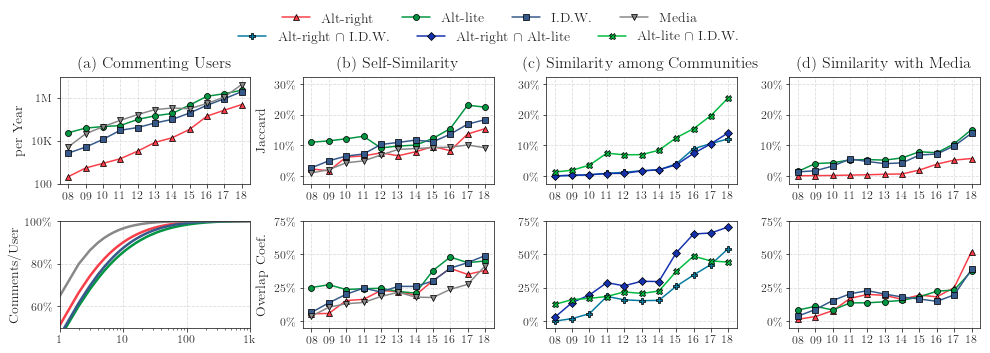

In [13]:
# gs = fig.add_gridspec(nrows=2, ncols=5, wspace=0.3, hspace=0.35, top=0.90)

# fig, axs = plt.subplots(1, 6, figsize=(16.5,2.25))

fig = plt.figure(
    constrained_layout=False,
    figsize=(16.5, 4.5),
)
gs = fig.add_gridspec(nrows=2, ncols=4, wspace=0.275, hspace=0.35, top=0.90)

axs = [
       fig.add_subplot(gs[0, 0]),
       fig.add_subplot(gs[0, 1]), 
       fig.add_subplot(gs[0, 2]), 
       fig.add_subplot(gs[0, 3]), 
       fig.add_subplot(gs[1, 1]), 
       fig.add_subplot(gs[1, 2]),  
       fig.add_subplot(gs[1, 3]),        
       fig.add_subplot(gs[1, 0])
      ]

# number of comments
sns.lineplot(x="idx_str", y="x", data=df_ar_al, markers=True, marker="^", mec="black",
             color=colors["Alt-right"], ax=axs[0], label="Alt-right")
sns.lineplot(x="idx_str", y="y", data=df_ar_al, markers=True, marker="o", mec="black", 
             color=colors["Alt-lite"], ax=axs[0],  label="Alt-lite")
sns.lineplot(x="idx_str", y="y", data=df_ar_idw, markers=True, marker="s", mec="black",
             color=colors["Intellectual Dark Web"], ax=axs[0],  label="I.D.W.")
sns.lineplot(x="idx_str", y="y", data=df_al_cn, markers=True, marker="v", mec="black",
             color=colors["Control"], ax=axs[0],  label="Media")

for cat in cats:
    tmp = df_cdf[df_cdf.category == cat]
    x = tmp.num.values
    y = np.cumsum(tmp["count"].values)
    y = y/y[-1]
    axs[7].plot(x, y, color=colors[cat], lw=2.5)
axs[7].set_xscale("log")
axs[7].set_xlim(1,1000)

# self similarity jaccard
sns.lineplot(x="idx_str", y="jaccard", data=df_ar_ar, markers=True, marker="^", mec="black",
             color=colors["Alt-right"], ax=axs[1])
sns.lineplot(x="idx_str", y="jaccard", data=df_al_al, markers=True, marker="o", mec="black", 
             color=colors["Alt-lite"], ax=axs[1])
sns.lineplot(x="idx_str", y="jaccard", data=df_idw_idw, markers=True, marker="s", mec="black",
             color=colors["Intellectual Dark Web"], ax=axs[1])
sns.lineplot(x="idx_str", y="jaccard", data=df_cn_cn, markers=True, marker="v", mec="black",
             color=colors["Control"], ax=axs[1])

# self similarity intersection coefficient
sns.lineplot(x="idx_str", y="ocof", data=df_ar_ar, markers=True, marker="^", mec="black",
             color=colors["Alt-right"], ax=axs[4])
sns.lineplot(x="idx_str", y="ocof", data=df_al_al, markers=True, marker="o", mec="black", 
             color=colors["Alt-lite"], ax=axs[4])
sns.lineplot(x="idx_str", y="ocof", data=df_idw_idw, markers=True, marker="s", mec="black",
             color=colors["Intellectual Dark Web"], ax=axs[4])
sns.lineplot(x="idx_str", y="ocof", data=df_cn_cn, markers=True, marker="v", mec="black",
             color=colors["Control"], ax=axs[4])


# similarity jaccard
sns.lineplot(x="idx_str", y="jaccard", data=df_ar_idw, markers=True, marker="P", mec="black",
             color="#06799F", ax=axs[2], label=r'Alt-right $\cap$ I.D.W.')
sns.lineplot(x="idx_str", y="jaccard", data=df_ar_al, markers=True, marker="D", mec="black", 
             color="#1531AE", ax=axs[2], label=r'Alt-right $\cap$ Alt-lite')
sns.lineplot(x="idx_str", y="jaccard", data=df_al_idw, markers=True, marker="X", mec="black",
             color="#00BB3F", ax=axs[2], label=r'Alt-lite $\cap$ I.D.W.')

# similarity intersection coefficient
sns.lineplot(x="idx_str", y="ocof", data=df_ar_idw, markers=True, marker="P", mec="black",
             color="#06799F", ax=axs[5])
sns.lineplot(x="idx_str", y="ocof", data=df_ar_al, markers=True, marker="D", mec="black", 
             color="#1531AE", ax=axs[5])
sns.lineplot(x="idx_str", y="ocof", data=df_al_idw, markers=True, marker="X", mec="black",
             color="#00BB3F", ax=axs[5])


sns.lineplot(x="idx_str", y="jaccard", data=df_ar_cn, markers=True, marker="^", mec="black",
             color=colors["Alt-right"], ax=axs[3])
sns.lineplot(x="idx_str", y="jaccard", data=df_al_cn, markers=True, marker="o", mec="black", 
             color=colors["Alt-lite"], ax=axs[3])
sns.lineplot(x="idx_str", y="jaccard", data=df_idw_cn, markers=True, marker="s", mec="black",
             color=colors["Intellectual Dark Web"], ax=axs[3])

sns.lineplot(x="idx_str", y="ocof", data=df_ar_cn, markers=True, marker="^", mec="black",
             color=colors["Alt-right"], ax=axs[6])
sns.lineplot(x="idx_str", y="ocof", data=df_al_cn, markers=True, marker="o", mec="black", 
             color=colors["Alt-lite"], ax=axs[6])
sns.lineplot(x="idx_str", y="ocof", data=df_idw_cn, markers=True, marker="s", mec="black",
             color=colors["Intellectual Dark Web"], ax=axs[6])

# Adds legend on the top
leg = axs[2].legend(loc='upper center',
           bbox_to_anchor=(-0.3, 1.55),
           ncol=3,
           fancybox=False,
           shadow=False,
           frameon=False,
           edgecolor=None,
           fontsize=14)

leg = axs[0].legend(loc='upper center',
           bbox_to_anchor=(2.25, 1.725),
           ncol=4,
           fancybox=False,
           shadow=False,
           frameon=False,
           edgecolor=None,
           fontsize=14)

for ax in axs[:7]:
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.yaxis.grid(color="#DCDCDC", linestyle='dashed')
    ax.xaxis.grid(color="#DCDCDC", linestyle='dashed')
    ax.set_xticklabels([str(v)[2:] for v in list(range(2008,2019)) ])
    
axs[0].set_yscale("log")
axs[0].set_ylim([100,10**7])
axs[0].set_title("(a) Commenting Users", pad=10)
axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(human_format))
axs[0].set_ylabel("per Year", fontsize=14)
axs[7].set_ylabel("Comments/User", fontsize=14)
axs[7].yaxis.grid(color="#DCDCDC", linestyle='dashed')
axs[7].xaxis.grid(color='#DCDCDC', linestyle='dashed')
axs[7].set_ylim([0.5, 1])
axs[7].set_xlim([1, 1000])
axs[7].set_xticks([1, 10, 100, 1000])
axs[7].set_xticklabels(["1", "10", "100", '1k'])
axs[7].set_yticklabels(["60\%", "80\%", "100\%"])
axs[7].set_yticks([.6, .8, 1])


axs[1].set_title("(b) Self-Similarity", pad=10)
axs[2].set_title("(c) Similarity among Communities", pad=10)
axs[3].set_title("(d) Similarity with Media", pad=10)
axs[1].set_ylabel("Jaccard", fontsize=14)

for ax in axs[1:4]:
    ax.set_ylim([-0.025, 0.325])
    ax.set_yticks([0, 0.10, 0.20, 0.30])
    ax.set_yticklabels(["0\%", "10\%", "20\%", "30\%"])
    
axs[4].set_ylabel("Overlap Coef.", fontsize=14)

for ax in axs[4:7]:
    ax.set_ylim([-0.05, 0.75])
    ax.set_yticks([0, 0.25, 0.50, 0.75])
    ax.set_yticklabels(["0\%", "25\%", "50\%", "75\%"])



fig.savefig("../imgs/unique_users_better.pdf", bbox_inches='tight')
fig.savefig("../imgs/unique_users_better.png", bbox_inches='tight')